# LAB2 Part A - Deep Computer Vision (Tensorflow / Keras)
The objective of this lab is to understand the fundamentals of Tensorflow and Keras with the most minimal convolutional neural network we can make from scratch before approaching other deep learning architectures

#### Project Info

 ->Copyright 2024 Luis R Soenksen

 ->Last Update: March 24, 2024

```
**Licensed under the Apache License, Version 2.0**
You may not use this file except in compliance with the License. You may obtain a copy of the License at
https://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.
```

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Compatible with Google Colab</a>      
    </td>
  <td>
    <a target="_blank" href="https://github.com/lrsoenksen/"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Visit my GitHub</a>
  </td>
  <td>
    <a href="https://www.tensorflow.org"><img src="https://storage.googleapis.com/cloud-samples-data/ai-platform/census/keras-tensorflow-cmle.png" width="150px"/>Built with Tensorflow / Keras / GC</a>
  </td>
</table>

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from random import randint

# In Google Colab, can change runtime to GPU if desired. If a TensorFlow
    # operation has both CPU and GPU implementations, by default the GPU device
# is prioritized when the operation is assigned.
device = tf.config.get_visible_devices()
print(device)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [33]:
'''
Fill the in the missing code marked as # TO-DO
'''
# Random seed for reproducibility
seed = 7
tf.keras.utils.set_random_seed(seed)

# Save the model at the end?
save_model = False

# Batch sizes for training and testing
batch_size = 32
test_batch_size = 14

# Training epochs
n_epochs = 10 # TO DO --- IGNORE ---

# Learning rate
learning_rate = 0.001 # TO DO --- IGNORE ---

# Decay rate for adjusting the learning rate
gamma = 0.7

# Number of target classes in the MNIST data
num_classes = 10

# Data input shape
input_shape = (28, 28, 1)

In [34]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# The scaled mean and standard deviation of the MNIST dataset (precalculated)
data_mean = 0.1307
data_std = 0.3081

# Reshape the input data
x_train = x_train.reshape(x_train.shape[0],
                          x_train.shape[1],
                          x_train.shape[2], 1)

x_test = x_test.reshape(x_test.shape[0],
                        x_test.shape[1],
                        x_test.shape[2], 1)

# Normalize the data
x_train = (x_train/255.0 - data_mean) / data_std
x_test = (x_test/255.0 - data_mean) / data_std

# Convert labels to one-hot vectors
y_train = tf.one_hot(y_train.astype(np.int32), depth=num_classes)
y_test = tf.one_hot(y_test.astype(np.int32), depth=num_classes)

In [35]:
# Define the architecture of the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), strides=(1,1),
                                      padding='valid',
                                      activation='relu',
                                      input_shape=input_shape),
    tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),
                                      padding='valid',
                                      activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [36]:
# Decay the learning rate at a base rate of gamma roughly every epoch, which
# is len(x_train) steps
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    learning_rate,
    decay_steps=len(x_train),
    decay_rate=gamma)

# Define the optimizer to user for gradient descent
optimizer = tf.keras.optimizers.Adadelta(scheduler)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])                       #TO DO

# Display a model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
'''
Fill the in the missing code marked as # TO-DO
'''
# Train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          validation_data=(x_test, y_test),
          validation_batch_size=test_batch_size)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.3129 - loss: 2.1148 - val_accuracy: 0.7364 - val_loss: 1.8508
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.5491 - loss: 1.7011 - val_accuracy: 0.7979 - val_loss: 1.3416
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 633s 338ms/step - accuracy: 0.6488 - loss: 1.3024 - val_accuracy: 0.8271 - val_loss: 0.9489
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.7082 - loss: 1.0322 - val_accuracy: 0.8513 - val_loss: 0.7201
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.7450 - loss: 0.8721 - val_accuracy: 0.8678 - val_loss: 0.5906
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.7699 - loss: 0.7699 - val_accuracy: 0.8798 - val_loss: 0.5110
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.7899 - loss: 0.6996 - val_accuracy: 0.8874 - val_loss: 0.4597
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.8060

In [38]:
if save_model:
    model.save_weights("mnist_cnn_tf.ckpt")

In [39]:
'''
Fill the in the missing code marked as # TO-DO
'''
import matplotlib.pyplot as plt
def visualize_and_predict_tf(model, x_test, y_test, index=0):
    # Select a single image and its label by index
    img = x_test[index]
    label = y_test[index]

    # Visualize the image
    plt.imshow(img.squeeze(), cmap='gray')  # Reshape for grayscale image
    plt.title(f'Actual Label: {np.argmax(label)}')
    plt.show()

    # Run inference
    img = np.expand_dims(img, axis=0) #Add batch dimension using np.expand_dims()
    predictions = model.predict(img)
    # TO DO
    pred_label = np.argmax(predictions, axis=1)[0]          
    #get predicted class using argmax()

    print(f'Predicted Label: {pred_label}')

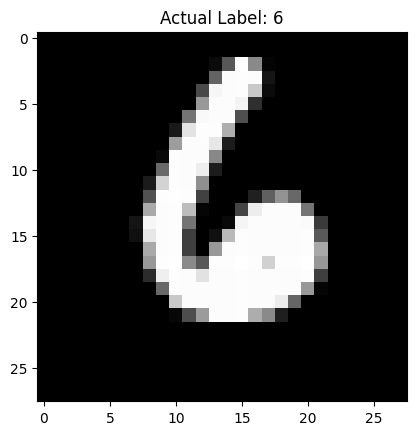

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Predicted Label: 6


In [40]:
visualize_and_predict_tf(model, x_test, y_test, index=randint(0, len(x_test)))

------------------------------------------------------
------------------------------------------------------